<a href="https://colab.research.google.com/github/sudheendrakatikar/cmpe255-project-team1/blob/main/maincode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255 Group Project

###Includes

In [ ]:
# Includes
from google.colab import files
from google.colab import drive

import pandas as pd
import numpy as np
import folium
from folium import features
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


# Use line below to unmount
# drive.flush_and_unmount()

# Use line below to mount drive to access data
# drive.mount('/content/drive')

### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Defining Load Data Function

In [ ]:
#Data Preprocessing Functions
def load_data(filename):
    # Create Pandas Dataframe from CSV File. 
    # Input filename as a String

    return pd.read_csv(filename, encoding='utf-8')

### Define Cleanup Data Functions

In [ ]:
#Clean Up Functions

#Below are incomplete functions for cleaning data. Feel free to Modify for our own use
def remove_unnecersary_columns(df):
    df.drop([], axis=1, inplace=True)
    return

def  fill_missing_values(df):
    #df.fillna(value="No Name", inplace=True)

    #Display For Debugging
    #display(df)
    return
def drop_col(df):
    #df.drop(['LATITUDE', 'LONGITUDE'], axis=1, inplace=True)
    #display(df)
    return

def drop_row(df):
    df.dropna(subset=['LATITUDE', 'LONGITUDE', 'ON STREET NAME'], inplace = True)    
    return

### Define Visualization Functions

In [ ]:
def pieChart(data):
  data.BOROUGH.value_counts().plot.pie(title='Accident % by Borough', label='', autopct='%1.1f%%', figsize=(12, 5), startangle=0)

In [ ]:
def barChart(data):
  time_series = pd.Series([ int(time.split(':')[0]) for time in data['CRASH TIME'] ]).value_counts().sort_index()
  time_series.plot(kind='bar', title='Accidents in NYC by hour', figsize=(12, 5))

In [ ]:
def heatmap(data):
  heatmap = folium.Map(location=[40.742459, -73.971765], zoom_start=12)
  coords = [[x[0], x[1], 1] for x in np.array(data[['LATITUDE', 'LONGITUDE']].dropna())]
  print(coords)
  HeatMap(coords, radius = 20).add_to(heatmap)
  heatmap

### Load Data

In [ ]:
data = load_data('/content/drive/Shareddrives/CMPE_255/255_Project/motor_vehicle_collisions_crashes.csv')
print("Showing Original Data ---------------------------------------------------------")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Showing Original Data ---------------------------------------------------------


### Define Method Functions

#### Method 1: Association Analysis

In [ ]:
def association_analysis(data):
    #print(data.columns)
    data.drop(columns=['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID',  'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace = True)
    display(data.head(5))
    display(data.shape)

    
    #data.rename(columns = {'Number of Persons Injured':'persons_injured'}, inplace = True)
    #data.rename(columns = {'Number of Persons Killed':'killed'}, inplace = True)

    #data.drop(data.index[data['NUMBER OF PERSONS INJURED'] == 0.0], inplace=True)

    data.dropna(subset=['ON STREET NAME'], inplace = True)
    te = TransactionEncoder()
    te_ary = te.fit(data).transform(data) 
    df = pd.DataFrame(te_ary, columns=te.columns_)
    print(df)

    frequent_itemsets = apriori(df, min_support=0.000001, use_colnames=False)
    print("\n")
    print(frequent_itemsets)

In [ ]:
association_analysis(data)

,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,VEHICLE TYPE CODE 1
0,BRONX WHITESTONE BRIDGE,0.0,0.0,Sedan
1,NaN,1.0,0.0,Sedan
2,HUTCHINSON RIVER PARKWAY,0.0,0.0,Station Wagon/Sport Utility Vehicle
3,VANDERVORT AVENUE,0.0,0.0,Sedan
4,EDSON AVENUE,0.0,0.0,Station Wagon/Sport Utility Vehicle


(1823537, 4)

                    1      A      B      C  ...      S      T      U      V      Y
0         True  False   True  False  False  ...   True   True  False  False  False
1         True  False  False   True  False  ...   True  False   True  False  False
2         True  False  False   True  False  ...   True  False   True  False  False
3         True   True  False  False   True  ...  False   True  False   True   True
4        False  False  False  False  False  ...  False  False  False  False  False
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
1451802  False  False  False  False  False  ...  False  False  False  False  False
1451803  False  False  False  False  False  ...  False  False  False  False  False
1451804  False  False  False  False  False  ...  False  False  False  False  False
1451805  False  False  False  False  False  ...  False  False  False  False  False
1451806  False  False  False  False  False  ...  False  False  False  False  False

[14

#### Method 2: Classification

#### Method 3: 

###Cleaning Data

In [ ]:
#Cleaning Data Example - Note that this is only an example. 
# Data is cleaned on a use case depending on which method is being applied
drop_row(data)
display(data)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
4,04/12/2021,8:25,NaN,NaN,0.000000,0.000000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
13,05/21/2019,22:50,BROOKLYN,11201,40.697540,-73.983120,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4136992,�MBU,Taxi,NaN,NaN,NaN
16,03/09/2021,11:00,NaN,NaN,40.692547,-73.990974,"(40.692547, -73.990974)",COURT STREET,JORALEMON STREET,NaN,1.0,0.0,0,0,0,0,1,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4397513,Pick-up Truck,Sedan,NaN,NaN,NaN
17,03/31/2021,22:20,BROOKLYN,11234,40.626457,-73.918000,"(40.626457, -73.918)",RALPH AVENUE,AVENUE K,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inexperience,Unspecified,NaN,NaN,NaN,4403773,Sedan,Sedan,NaN,NaN,NaN
18,04/06/2021,22:58,STATEN ISLAND,10312,40.526894,-74.167280,"(40.526894, -74.16728)",BARCLAY AVENUE,HYLAN BOULEVARD,NaN,7.0,0.0,0,0,0,0,7,0,Failure to Yield Right-of-Way,Unsafe Speed,NaN,NaN,NaN,4405244,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823531,07/07/2012,17:35,BROOKLYN,11235,40.575802,-73.961137,"(40.5758019, -73.9611371)",BRIGHTON 6 STREET,BRIGHTWATER COURT,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,113584,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1823532,07/06/2012,15:09,MANHATTAN,10035,40.801235,-73.941815,"(40.8012354, -73.9418153)",EAST 119 STREET,PARK AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,59654,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1823533,07/03/2012,17:30,QUEENS,11102,40.774711,-73.933386,"(40.7747112, -73.9333863)",27 AVENUE,4 STREET,NaN,2.0,0.0,0,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,272592,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1823534,07/01/2012,15:30,BROOKLYN,11236,40.645032,-73.919978,"(40.6450318, -73.9199775)",RALPH AVENUE,CLARENDON ROAD,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,135041,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN


### Data Visualizations

In [ ]:
#Analyzing Data
print("Pie Chart")
#pieChart(data)

print("Bar Chart")
#barChart(data)

print("Heat Map")
#heatmap(data)

#association_analysis(data)

Pie Chart
Bar Chart
Heat Map


### MANASA

### Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load data

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/Shareddrives/CMPE_255/255_Project/motor_vehicle_collisions_crashes.csv')
data.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


Checking for null values

In [ ]:
data.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           562783
ZIP CODE                          563002
LATITUDE                          213787
LONGITUDE                         213787
LOCATION                          213787
ON STREET NAME                    371730
CROSS STREET NAME                 652865
OFF STREET NAME                  1544176
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5205
CONTRIBUTING FACTOR VEHICLE 2     262800
CONTRIBUTING FACTOR VEHICLE 3    1699094
CONTRIBUTING FACTOR VEHICLE 4    1796391
CONTRIBUTING FACTOR VEHICLE 5    1816356
COLLISION_ID                           0
VEHICLE TYPE COD

Dropping the columns with more null data

In [ ]:
data=data.drop(columns=['VEHICLE TYPE CODE 5','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 3','CONTRIBUTING FACTOR VEHICLE 5','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 3','OFF STREET NAME','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2'])

Since we have very large data i have taken only sub set of the data and analysed.

In [ ]:
half_df = len(data) // 2
first_df= data.iloc[:half_df,]
k=len(first_df)//2
second_df=first_df.iloc[:k,]
l=len(second_df)//2
final_df=second_df.iloc[:l,]

In [ ]:
index = final_df.index
number_of_rows = len(index)
print(number_of_rows)

227942


Filling NaN values with 0 

In [ ]:
final_df.fillna(0)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
0,04/14/2021,5:32,0,0.0,0.000000,0.00000,0,BRONX WHITESTONE BRIDGE,0,0.0,0.0,0,0,0,0,0,0,4407480
1,04/13/2021,21:35,BROOKLYN,11217.0,40.683580,-73.97617,"(40.68358, -73.97617)",0,0,1.0,0.0,1,0,0,0,0,0,4407147
2,04/15/2021,16:15,0,0.0,0.000000,0.00000,0,HUTCHINSON RIVER PARKWAY,0,0.0,0.0,0,0,0,0,0,0,4407665
3,04/13/2021,16:00,BROOKLYN,11222.0,0.000000,0.00000,0,VANDERVORT AVENUE,ANTHONY STREET,0.0,0.0,0,0,0,0,0,0,4407811
4,04/12/2021,8:25,0,0.0,0.000000,0.00000,"(0.0, 0.0)",EDSON AVENUE,0,0.0,0.0,0,0,0,0,0,0,4406885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227937,10/23/2019,18:20,0,0.0,40.765675,-73.97624,"(40.765675, -73.97624)",0,0,0.0,0.0,0,0,0,0,0,0,4228328
227938,10/17/2019,11:20,0,0.0,40.738457,-73.93981,"(40.738457, -73.93981)",BORDEN AVENUE,29 STREET,0.0,0.0,0,0,0,0,0,0,4224773
227939,11/08/2019,14:30,MANHATTAN,10029.0,40.783930,-73.94423,"(40.78393, -73.94423)",EAST 97 STREET,1 AVENUE,0.0,0.0,0,0,0,0,0,0,4239798
227940,11/02/2019,23:00,QUEENS,11101.0,40.750240,-73.94208,"(40.75024, -73.94208)",42 ROAD,24 STREET,0.0,0.0,0,0,0,0,0,0,4234257


Checking the data type of the column data

In [ ]:
dataTypeSeries = final_df.dtypes
print(dataTypeSeries)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
COLLISION_ID                       int64
dtype: object


One-hot encoding is done on categorical data

In [ ]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
final_df['CRASH DATE'] = lbl.fit_transform(final_df['CRASH DATE'].astype(str))
final_df['CRASH TIME'] = lbl.fit_transform(final_df['CRASH TIME'].astype(str))
final_df['BOROUGH'] = lbl.fit_transform(final_df['BOROUGH'].astype(str))
final_df['ZIP CODE'] = lbl.fit_transform(final_df['ZIP CODE'].astype(str))
final_df['LOCATION'] = lbl.fit_transform(final_df['LOCATION'].astype(str))
final_df['ON STREET NAME'] = lbl.fit_transform(final_df['ON STREET NAME'].astype(str))
final_df['CROSS STREET NAME'] = lbl.fit_transform(final_df['CROSS STREET NAME'].astype(str))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
dataTypeSeries = final_df.dtypes
print(dataTypeSeries)

CRASH DATE                         int64
CRASH TIME                         int64
BOROUGH                            int64
ZIP CODE                           int64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                           int64
ON STREET NAME                     int64
CROSS STREET NAME                  int64
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
COLLISION_ID                       int64
dtype: object


In [ ]:
final_df.fillna(0,inplace=True)
final_df.astype(int)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
0,236,1172,5,211,0,0,77301,2247,6303,0,0,0,0,0,0,0,0,4407480
1,233,815,1,133,40,-73,29379,8599,6303,1,0,1,0,0,0,0,0,4407147
2,239,435,5,211,0,0,77301,4670,6303,0,0,0,0,0,0,0,0,4407665
3,233,420,1,138,0,0,77301,7406,1022,0,0,0,0,0,0,0,0,4407811
4,230,1345,5,211,0,0,0,3723,6303,0,0,0,0,0,0,0,0,4406885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227937,645,560,5,211,40,-73,56831,8599,6303,0,0,0,0,0,0,0,0,4228328
227938,633,140,5,211,40,-73,47830,2115,531,0,0,0,0,0,0,0,0,4224773
227939,678,330,2,27,40,-73,59554,3642,3,0,0,0,0,0,0,0,0,4239798
227940,666,900,3,111,40,-73,51688,906,470,0,0,0,0,0,0,0,0,4234257


In [ ]:
x=final_df.reset_index()[['CRASH TIME','LOCATION']].values.tolist()
# x=final_df['CRASH TIME']
# y=final_df['ON STREET NAME']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_scaled=scaler.fit_transform(x)

Created a K-Means model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42)

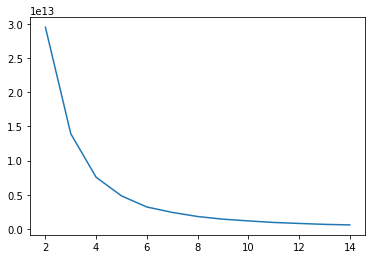

In [ ]:
from sklearn.cluster import KMeans
scores=[]
n=15
for i in range(2,n):
  km=KMeans(n_clusters=i,random_state=0).fit(x)
  pred=km.predict(x_scaled)
  scores.append(-km.score(x_scaled))
plt.plot([i for i in range(2,n)],scores)


In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 15), scores, curve="convex", direction="decreasing")
kl.elbow

5

Optimal value of k is 5.

In [ ]:
km=KMeans(n_clusters=5,random_state=0).fit(x_scaled)
km.cluster_centers_

array([[0.25309363, 0.18893028],
       [0.26753226, 0.53928622],
       [0.76508251, 0.29444561],
       [0.25203685, 0.88527735],
       [0.77173229, 0.81986047]])

[[0.81445448 1.        ]
 [0.56636553 0.38005977]
 [0.30229326 1.        ]
 ...
 [0.22932592 0.77041694]
 [0.62543433 0.66865888]
 [0.89645587 0.78427187]]


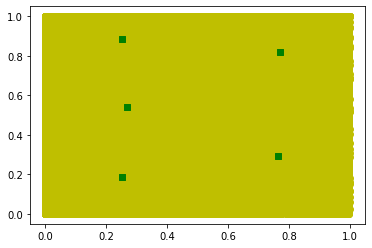

In [ ]:
import numpy as np
a=np.asarray(x_scaled)
print(a)
plt.scatter(a[:,0],a[:,1], c='y')
for c in km.cluster_centers_:
  plt.scatter(c[0],c[1], c='g',marker='s')
plt.show()

In [ ]:
x=final_df.reset_index()[['LATITUDE','LONGITUDE']].values.tolist()

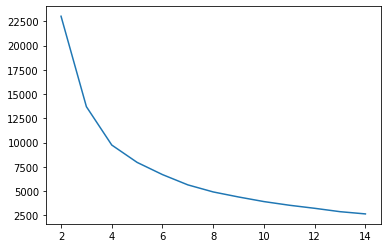

In [ ]:
from sklearn.cluster import KMeans
scores=[]
n=15
for i in range(2,n):
  km=KMeans(n_clusters=i,random_state=0).fit(x_scaled)
  pred=km.predict(x_scaled)
  scores.append(-km.score(x_scaled))
plt.plot([i for i in range(2,n)],scores)


In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 15), scores, curve="convex", direction="decreasing")
kl.elbow

5

In [ ]:
km=KMeans(n_clusters=5,random_state=0).fit(x_scaled)
km.cluster_centers_

array([[0.25309363, 0.18893028],
       [0.26753226, 0.53928622],
       [0.76508251, 0.29444561],
       [0.25203685, 0.88527735],
       [0.77173229, 0.81986047]])

[[0.81445448 1.        ]
 [0.56636553 0.38005977]
 [0.30229326 1.        ]
 ...
 [0.22932592 0.77041694]
 [0.62543433 0.66865888]
 [0.89645587 0.78427187]]


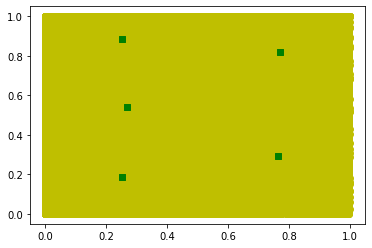

In [ ]:
import numpy as np
a=np.asarray(x_scaled)
print(a)
plt.scatter(a[:,0],a[:,1], c='y')
for c in km.cluster_centers_:
  plt.scatter(c[0],c[1], c='g',marker='s')
# plt.xlim([40.30,41])
# plt.ylim([-74.5,-73.5])
plt.show()

In [ ]:
# scaler = StandardScaler()
# Sum_of_squared_distances = []
# std_scale = scaler.fit(df)
# df_transformed = std_scale.transform(df)
# pca = PCA(n_components=3)
# pca = pca.fit(df_transformed)
# X = pca.transform(df_transformed)
# K = range(1,15)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(df_transformed)
#     Sum_of_squared_distances.append(km.inertia_)

In [ ]:
# clf = DecisionTreeClassifier()
# clf = clf.fit(x_train,y_train)
# y_pred = clf.predict(x_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# clf=RandomForestClassifier(n_estimators=20)
# clf.fit(x_train,y_train)

# y_pred=clf.predict(x_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data1=pd.read_csv('/content/drive/Shareddrives/CMPE_255/255_Project/motor_vehicle_collisions_crashes.csv')
data1.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [ ]:
pip install python-dateutil

 Plotting graph between year and the number of pedestrians injured

In [ ]:
x=data['CRASH DATE']
year=[]
from dateutil.parser import parse
for i in range(0,len(x.index)):
  dt = parse(x[i])
  y=dt.year
  year.append(y)
  

In [ ]:
y=data['NUMBER OF PEDESTRIANS INJURED']
y=y.astype(int)
#print(y[1:88])
l=year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


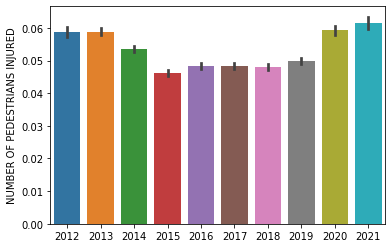

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
# plt.ylim([0,10])
#plt.bar(l,y)
plt=sns.barplot(l,y)
#plt.show()
#fig, ax = plt.subplots()


# #,kind=plt.plot(l,y) 


Plotting graph between year and number of pedestrains killed

In [ ]:
y=data['NUMBER OF PEDESTRIANS KILLED']
y=y.astype(int)
l=year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


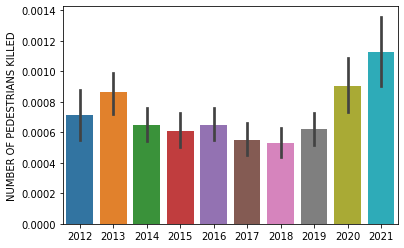

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

#plt.bar(l,y)
plt=sns.barplot(l,y)

Plotting graph between year and number of cyclist injured

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


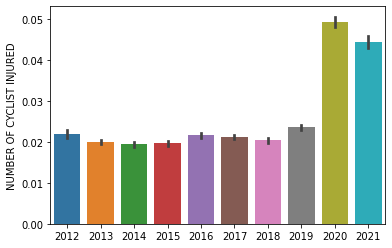

In [ ]:
y=data['NUMBER OF CYCLIST INJURED']
y=y.astype(int)
l=year
plt=sns.barplot(l,y)

Plotting graph between year and number of cyclist killed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


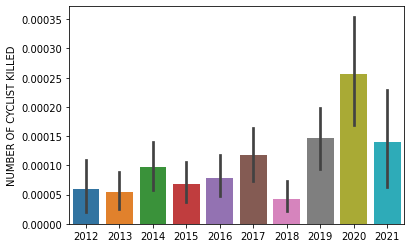

In [ ]:
y=data['NUMBER OF CYCLIST KILLED']
y=y.astype(int)
l=year
plt=sns.barplot(l,y)

Plotting grapgh between year and number of motorist killed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


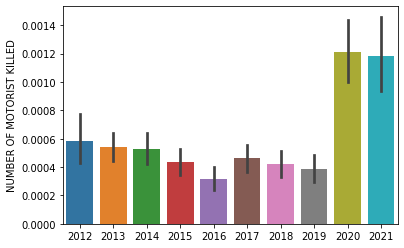

In [ ]:
y=data['NUMBER OF MOTORIST KILLED']
y=y.astype(int)
l=year
plt=sns.barplot(l,y)

Plotting grapgh between year and number of motorist injured

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


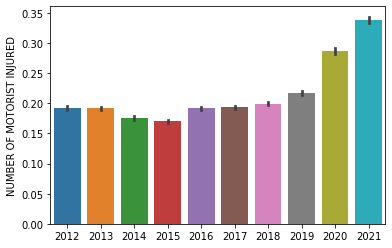

In [ ]:
y=data['NUMBER OF MOTORIST INJURED']
y=y.astype(int)
l=year
plt=sns.barplot(l,y)